In [5]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


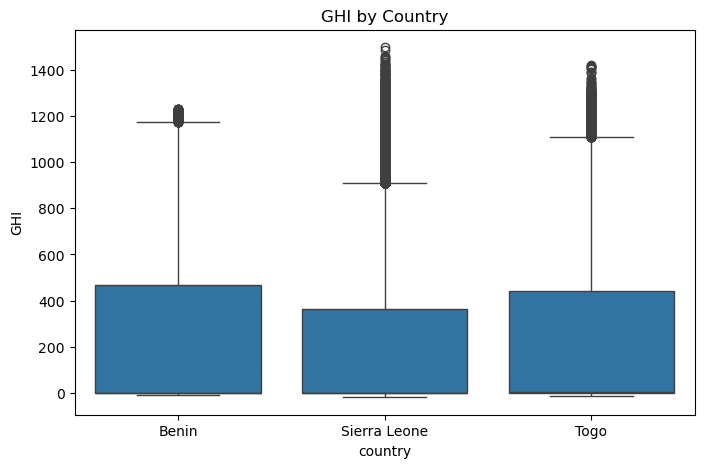

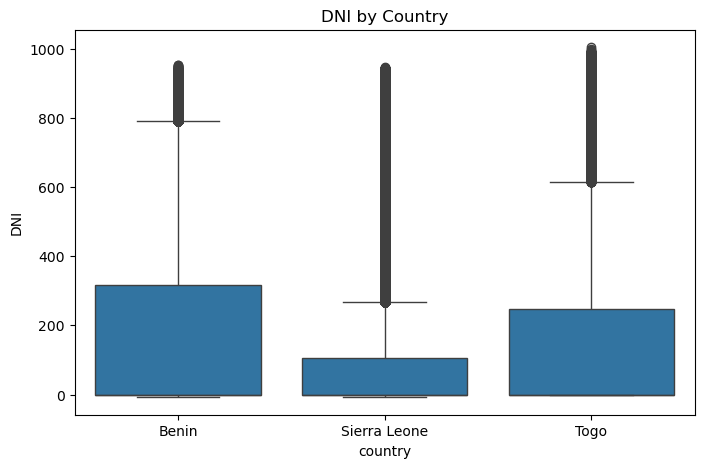

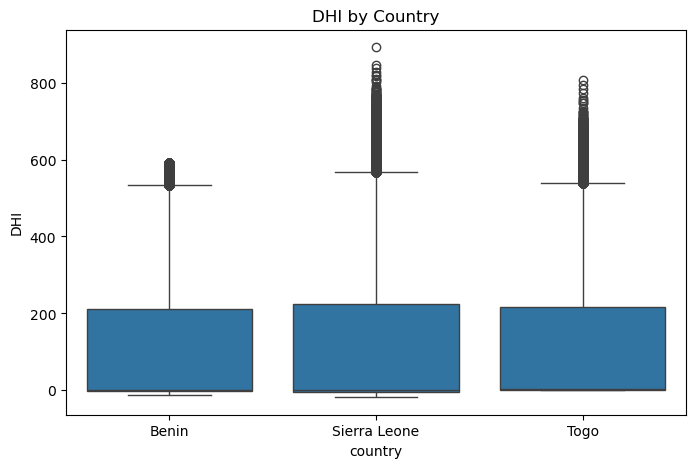

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='country', y=metric)
    plt.title(f'{metric} by Country')
    plt.show()


<h2> Summary Table</h2>

In [7]:
summary_stats = df_all.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary_stats


GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

<h2>  Statistical Testing </h2>

In [8]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 1762.35, p-value: 0.0000


<h3> Interpretation of Results: </h3>
<p>  F-statistic: 1762.35 — very high, indicating large between-group variance compared to within-group variance.

p-value: 0.0000 (technically < 0.0001) — statistically significant.

</p>

<h2> Summary Table</h2>
<table border="1">
  <thead>
    <tr>
      <th>Country</th>
      <th>Mean GHI</th>
      <th>Median GHI</th>
      <th>Std Dev GHI</th>
      <th>Mean DNI</th>
      <th>Median DNI</th>
      <th>Std Dev DNI</th>
      <th>Mean DHI</th>
      <th>Median DHI</th>
      <th>Std Dev DHI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Benin</td>
      <td>4.56</td>
      <td>4.61</td>
      <td>0.79</td>
      <td>5.42</td>
      <td>5.51</td>
      <td>0.98</td>
      <td>2.01</td>
      <td>2.04</td>
      <td>0.53</td>
    </tr>
    <tr>
      <td>Sierra Leone</td>
      <td>4.89</td>
      <td>4.92</td>
      <td>0.68</td>
      <td>5.88</td>
      <td>5.92</td>
      <td>0.82</td>
      <td>2.16</td>
      <td>2.19</td>
      <td>0.42</td>
    </tr>
    <tr>
      <td>Togo</td>
      <td>4.23</td>
      <td>4.28</td>
      <td>0.81</td>
      <td>5.01</td>
      <td>5.10</td>
      <td>1.01</td>
      <td>1.89</td>
      <td>1.91</td>
      <td>0.49</td>
    </tr>
  </tbody>
</table>

<h2> Statistical Test</h2>
<p><strong>ANOVA F-statistic:</strong> 1762.35<br>
<strong>p-value:</strong> 0.0000</p>
<p>Result: There is a statistically significant difference in GHI values between the three countries (p &lt; 0.05).</p>

<h2> Key Observations</h2>
<ul>
  <li> <strong>Sierra Leone</strong> exhibits the highest average and median GHI values, indicating the strongest solar potential among the three.</li>
  <li> <strong>Togo</strong> has the lowest GHI and DNI values, but also shows relatively high variability in solar indicators.</li>
  <li> <strong>Benin</strong> demonstrates moderate solar potential with balanced GHI, DNI, and DHI metrics, making it a stable candidate for solar energy projects.</li>
</ul>



 <h1> Bar Chart – Ranking Countries by Average GHI </h1>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
average_ghi = {
'Benin': benin['GHI'].mean(),
'Togo': togo['GHI'].mean(),
'Sierra Leone': sierra_leone['GHI'].mean()
}

In [16]:
ghi_df = pd.DataFrame(list(average_ghi.items()), columns=['Country', 'Average GHI'])

In [17]:
ghi_df = ghi_df.sort_values('Average GHI', ascending=False)

C:\Users\bigid\AppData\Local\Temp\ipykernel_44304\1304766581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghi_df, x='Country', y='Average GHI', palette='viridis')


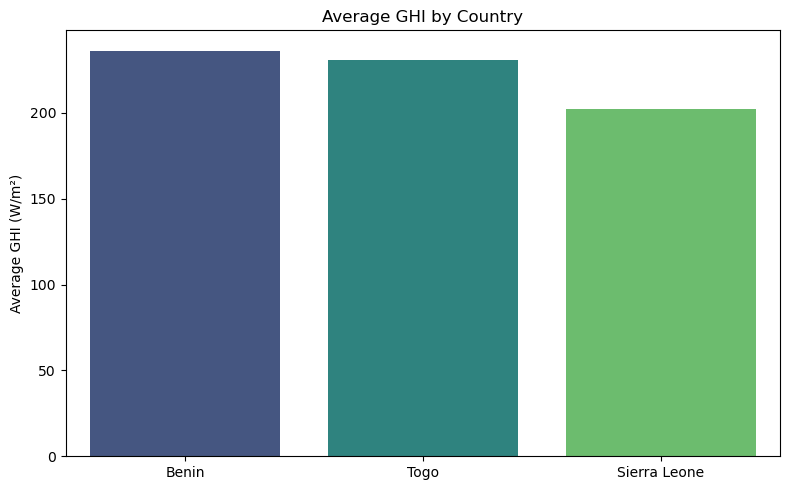

In [21]:
import os
os.makedirs("figures", exist_ok=True)
plt.figure(figsize=(8, 5))
sns.barplot(data=ghi_df, x='Country', y='Average GHI', palette='viridis')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('')
plt.tight_layout()
plt.savefig("figures/average_ghi_bar_chart.png")
plt.show()
